In [ ]:
#Artificial neural network (LSTM) in order to predict the closing stock price of a corporation

In [ ]:
#Libraries
import yfinance as yf

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,0.0,0.0
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,0.0,0.0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-16 00:00:00-04:00', '2023-06-20 00:00:00-04:00',
               '2023-06-21 00:00:00-04:00', '2023-06-22 00:00:00-04:00',
               '2023-06-23 00:00:00-04:00', '2023-06-26 00:00:00-04:00',
               '2023-06-27 00:00:00-04:00', '2023-06-28 00:00:00-04:00',
               '2023-06-29 00:00:00-04:00', '2023-06-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23989, freq=None)

<Axes: xlabel='Date'>

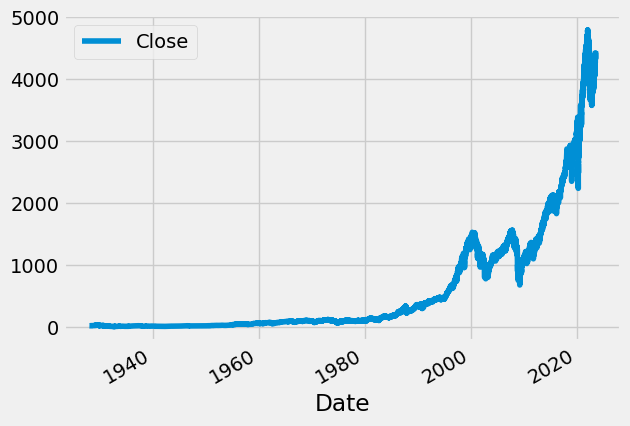

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
if "Dividends" in sp500.keys():
    del sp500["Dividends"]
if "Stock Splits" in sp500.keys():
    del sp500["Stock Splits"]

In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941


In [ ]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-26 00:00:00-04:00,4344.839844,4362.060059,4328.080078,4328.819824,3415030000,4378.410156,1
2023-06-27 00:00:00-04:00,4337.359863,4384.419922,4335.000000,4378.410156,3573500000,4376.859863,0
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1


In [ ]:
sp500 = sp500["1990-01-01":].copy()

Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

Checking the accuracy of the model  

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [ ]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [ ]:
preds

Date
2023-02-07 00:00:00-05:00    0
2023-02-08 00:00:00-05:00    1
2023-02-09 00:00:00-05:00    1
2023-02-10 00:00:00-05:00    1
2023-02-13 00:00:00-05:00    0
                            ..
2023-06-26 00:00:00-04:00    0
2023-06-27 00:00:00-04:00    1
2023-06-28 00:00:00-04:00    1
2023-06-29 00:00:00-04:00    1
2023-06-30 00:00:00-04:00    1
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.6046511627906976

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)


<Axes: xlabel='Date'>

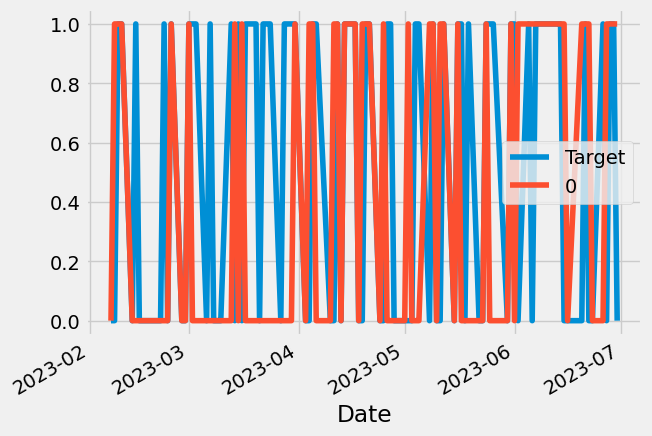

In [ ]:
combined.plot()

Backtesting environment

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined



In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
  all_prediction = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_prediction.append(predictions)
  return pd.concat(all_prediction)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    3433
1    2506
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5295291300877893

In [ ]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.533928
0    0.466072
Name: Target, dtype: float64

Reinforcing model w/more predictors

In [ ]:
##Compute rolling averages

horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]



In [ ]:
sp500 = sp500.dropna()

In [ ]:
#updating model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state = 1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    4122
1.0     816
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5686274509803921